In [71]:
from modules import constants as cnst
from modules import ana_moment_fit
from modules import gram_schmidt_v0
from modules import gram_schmidt_v1
import math
from scipy.interpolate import interp1d
%pylab notebook

figpath="./figures/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib
mkdir: ./figures/: File exists


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'cov', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [53]:
def mbb(nu,T,A,alpha,nu0=1.):
    x=cnst.planck_const*nu*cnst.ghz2hz/(cnst.boltzman_const*T)
    Inu=A*((nu/nu0)**alpha)*(nu**3.)/(np.exp(x)-1.)
    return Inu

def multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=1.):
    Inu=mbb(nu,T1,A1,alpha1,nu0=nu0) + mbb(nu,T2,A2,alpha2,nu0=nu0)
    return Inu

f=0.34188
T1=9.75 ; A1=f; alpha1=1.63; T2=15.7 ; A2 =(1.-f); alpha2=2.82

Abar=A1+A2
Tbar=Abar/((A1/T1)+(A2/T2))
nu0=cnst.boltzman_const*Tbar/cnst.planck_const/cnst.ghz2hz
print Abar,Tbar,nu0

#nu=[100.,143.,217.,353.,545., 857.] ; nu=np.array(nu)
nu_min=10. ; nu_max=3000.

# Logarithmic spacing
nu=logspace(np.log10(nu_min),np.log10(nu_max),100) ; nu[0]=nu_min ; nu[-1]=nu_max
Inu=multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)
#t_nu=logspace(np.log10(nu_min),np.log10(nu_max),2000) ; t_nu[0]=nu_min ; t_nu[-1]=nu_max
#t_Inu=multitemp_mbb_spectra(t_nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)

# # Linear spacing
nu=linspace(nu_min,nu_max,100)
Inu=multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)
# t_nu=linspace(nu_min,nu_max,500)
# t_Inu=multitemp_mbb_spectra(t_nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)

# fn=interp1d(nu,Inu,kind="quadratic") ; norm=3388/fn(100.)
# Inu=Inu*norm ; t_Inu=t_Inu*norm
# quad_spline_fn=interp1d(nu,Inu,kind="quadratic")
# cub_spline_fn=interp1d(nu,Inu,kind="cubic")
#figure()
#plot(nu,Inu)
#plot(nu,mbb(nu,T1,A1,alpha1,nu0=3000.),"b--",lw=2)
#plot(nu,mbb(nu,T2,A2,alpha2,nu0=3000.),"r--",lw=2)
#loglog()
#ylabel(r"$I_{\nu}$")
#xlabel(r"$\nu$[GHz]")
#grid()
#legend(loc=0)
#xticks([100,353,545,857,3000],[100,353,545,857,3000])

1.0 12.9898662496 270.664805898


In [70]:
log1p?

In [54]:
mf=ana_moment_fit.moment_fit(8)

In [55]:
par0=mf.fit_monopole_sed(nu,Inu,0,bounds_true=True,prange=10,maxfev=200000,flat_sensitivity=True) ; print par0
#par2=mf.fit_monopole_sed(nu,Inu,2,bounds_true=True,prange=10,maxfev=200000,flat_sensitivity=True) ; print par2
#par3=mf.fit_monopole_sed(nu,Inu,3,maxfev=500000,flat_sensitivity=True,bounds_true=True) ; print par3

[  3.81711662e-03   1.79714227e+01   1.93452624e+00]


<IPython.core.display.Javascript object>


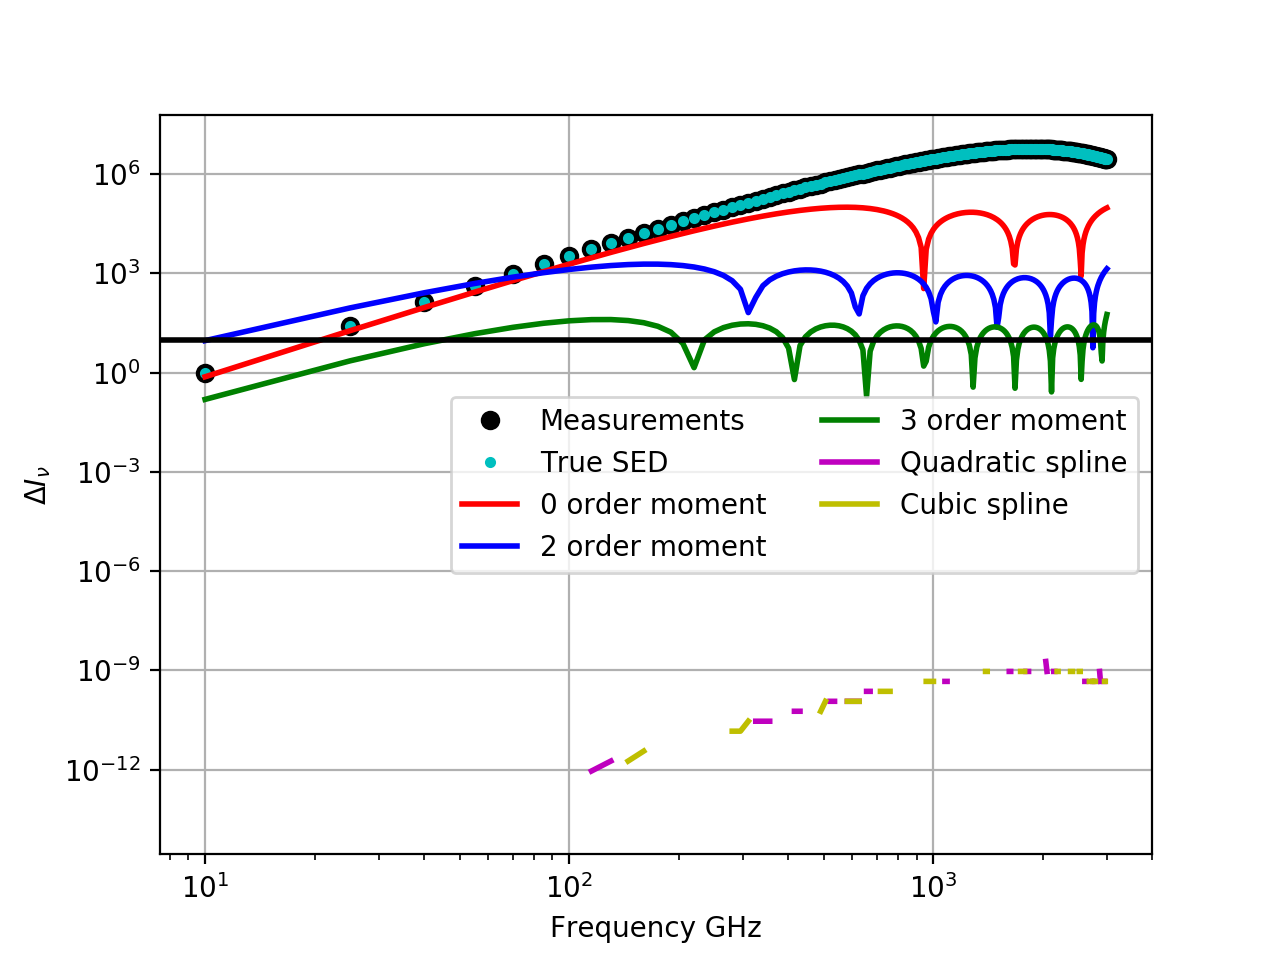

In [17]:
x0=nu ; y0=Inu
figure()
plot(nu,Inu,"ko",label="Measurements")
plot(x0,y0,"c.",lw=4,label="True SED")
plot(x0,abs(y0-mf.moment_expansion_function(x0,*par0)),"r-",lw=2,label="0 order moment")
plot(x0,abs(y0-mf.moment_expansion_function(x0,*par2)),"b-",lw=2,label="2 order moment")
plot(x0,abs(y0-mf.moment_expansion_function(x0,*par3)),"g-",lw=2,label="3 order moment")
plot(x0,abs(y0-quad_spline_fn(x0)),"m-",lw=2,label="Quadratic spline")
plot(x0,abs(y0-cub_spline_fn(x0)),"y-",lw=2,label="Cubic spline")
axhline(10.,color="black",linewidth=2)
legend(loc=0,fontsize=10.,ncol=2)
loglog()
grid()
xlabel("Frequency GHz")
ylabel(r"$\Delta I_{\nu}$")
savefig(figpath + "spline_vs_moments.pdf",dpi=150,bbox_inches="tight")

In [22]:
A=par0[0] ; T=par0[1] ; slope=par0[2]
ppar1=mf.fit_sed_perturbatively(nu,Inu,1,A,T,slope)
ppar2=mf.fit_sed_perturbatively(nu,Inu,2,A,T,slope)
ppar3=mf.fit_sed_perturbatively(nu,Inu,3,A,T,slope)
ppar4=mf.fit_sed_perturbatively(nu,Inu,4,A,T,slope)
ppar5=mf.fit_sed_perturbatively(nu,Inu,5,A,T,slope)
ppar6=mf.fit_sed_perturbatively(nu,Inu,6,A,T,slope)
ppar7=mf.fit_sed_perturbatively(nu,Inu,7,A,T,slope)
ppar8=mf.fit_sed_perturbatively(nu,Inu,8,A,T,slope)

Fitting for 3  parameters
Fitting for 6  parameters
Fitting for 10  parameters
Fitting for 15  parameters
Fitting for 21  parameters
Fitting for 28  parameters
Fitting for 36  parameters
Fitting for 45  parameters


<IPython.core.display.Javascript object>


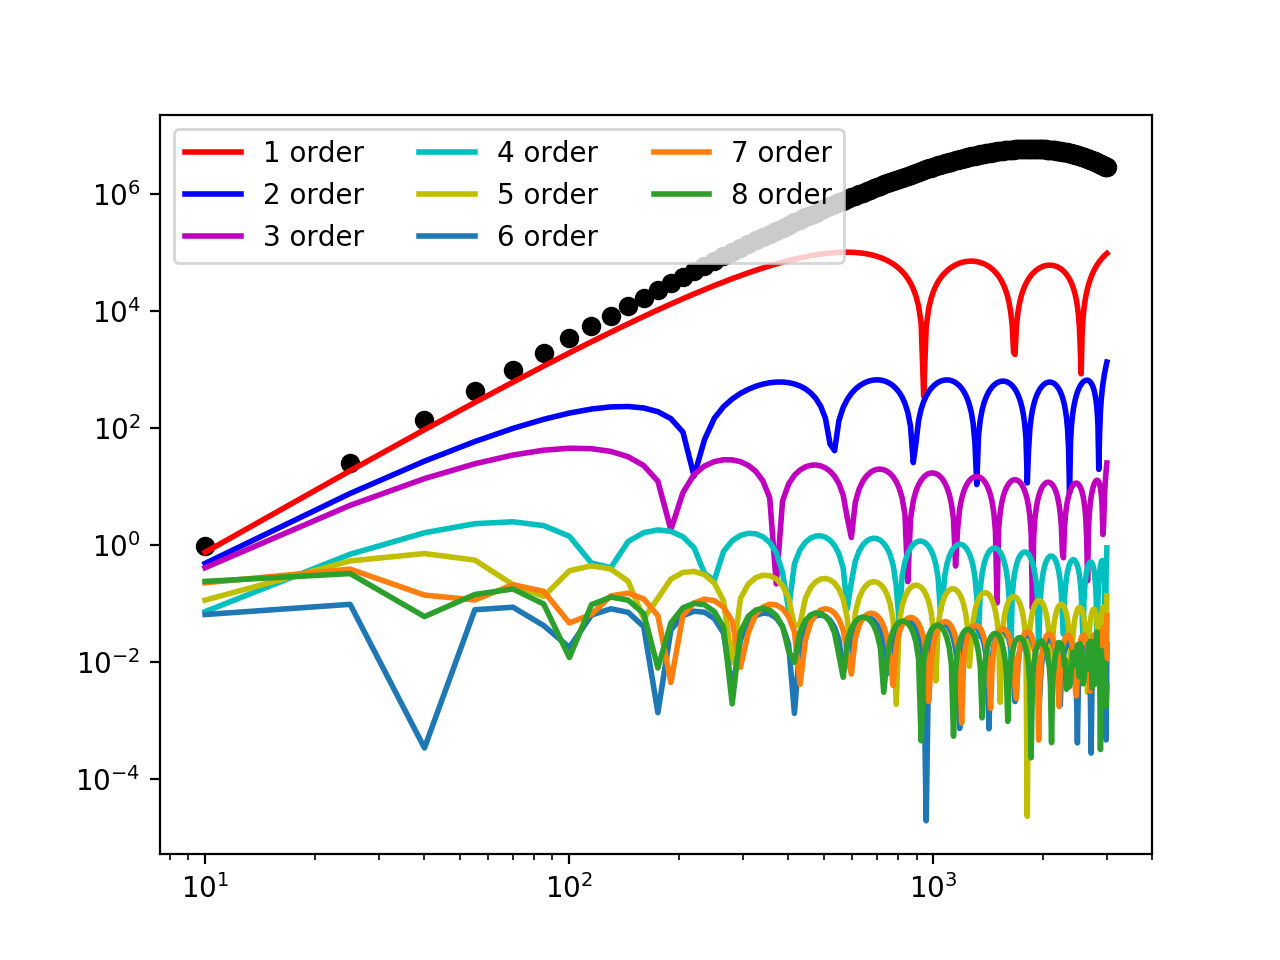

In [23]:
figure()
plot(nu,Inu,"ko",lw=2)
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar1)),"r-",lw=2,label="1 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar2)),"b-",lw=2,label="2 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar3)),"m-",lw=2,label="3 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar4)),"c-",lw=2,label="4 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar5)),"y-",lw=2,label="5 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar6)),"-",lw=2,label="6 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar7)),"-",lw=2,label="7 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar8)),"-",lw=2,label="8 order")
legend(loc="upper left",ncol=3)
#hlines(1)
loglog()
savefig(figpath + "perturbative_around_0order_fit.pdf",dpi=150,bbox_inches="tight")

In [19]:
A=par3[0] ; T=par3[1] ; slope=par3[2]
ppar1=mf.fit_sed_perturbatively(nu,Inu,1,A,T,slope)
ppar2=mf.fit_sed_perturbatively(nu,Inu,2,A,T,slope)
ppar3=mf.fit_sed_perturbatively(nu,Inu,3,A,T,slope)
ppar4=mf.fit_sed_perturbatively(nu,Inu,4,A,T,slope)
ppar5=mf.fit_sed_perturbatively(nu,Inu,5,A,T,slope)
ppar6=mf.fit_sed_perturbatively(nu,Inu,6,A,T,slope)
ppar7=mf.fit_sed_perturbatively(nu,Inu,7,A,T,slope)
ppar8=mf.fit_sed_perturbatively(nu,Inu,8,A,T,slope)

Fitting for 3  parameters
Fitting for 6  parameters
Fitting for 10  parameters
Fitting for 15  parameters
Fitting for 21  parameters
Fitting for 28  parameters
Fitting for 36  parameters
Fitting for 45  parameters


<IPython.core.display.Javascript object>


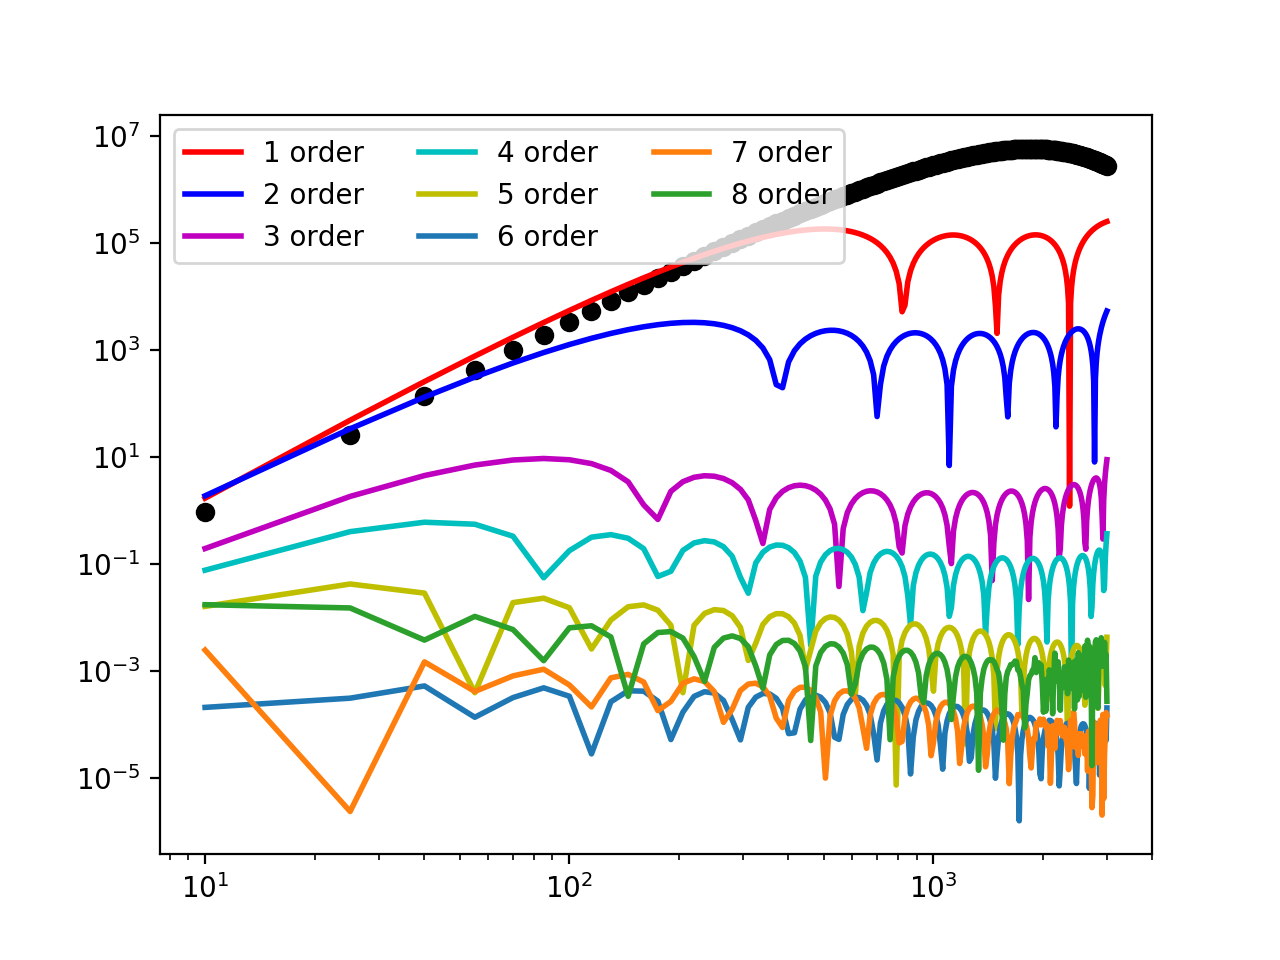

In [20]:
figure()
plot(nu,Inu,"ko",lw=2)
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar1)),"r-",lw=2,label="1 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar2)),"b-",lw=2,label="2 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar3)),"m-",lw=2,label="3 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar4)),"c-",lw=2,label="4 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar5)),"y-",lw=2,label="5 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar6)),"-",lw=2,label="6 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar7)),"-",lw=2,label="7 order")
plot(nu,abs(Inu-mf.perturbative_moment_expansion_function(nu,A,T,slope,*ppar8)),"-",lw=2,label="8 order")
legend(loc="upper left",ncol=3)
#hlines(1)
loglog()
savefig(figpath + "perturbative_around_3order_fit.pdf",dpi=150,bbox_inches="tight")

In [56]:
gs=gram_schmidt_v0.gram_schmidt_fitting(10)
T=par0[1] ; slope=par0[2]
gs.gram_schmidt_iterative(nu,T,slope,tol=1e-15,max_iter=10000)

# gs1=gram_schmidt_v1.gram_schmidt_fitting(6)
# T=par3[1] ; slope=par3[2]
# gs1.gen_vectors(T,slope,nu_min,nu_max,sampling=1e5,logspace=False)
# gs1.gram_schmidt_iterative(tol=1e-5,max_iter=10,min_vec_norm=1e-5)

<IPython.core.display.Javascript object>


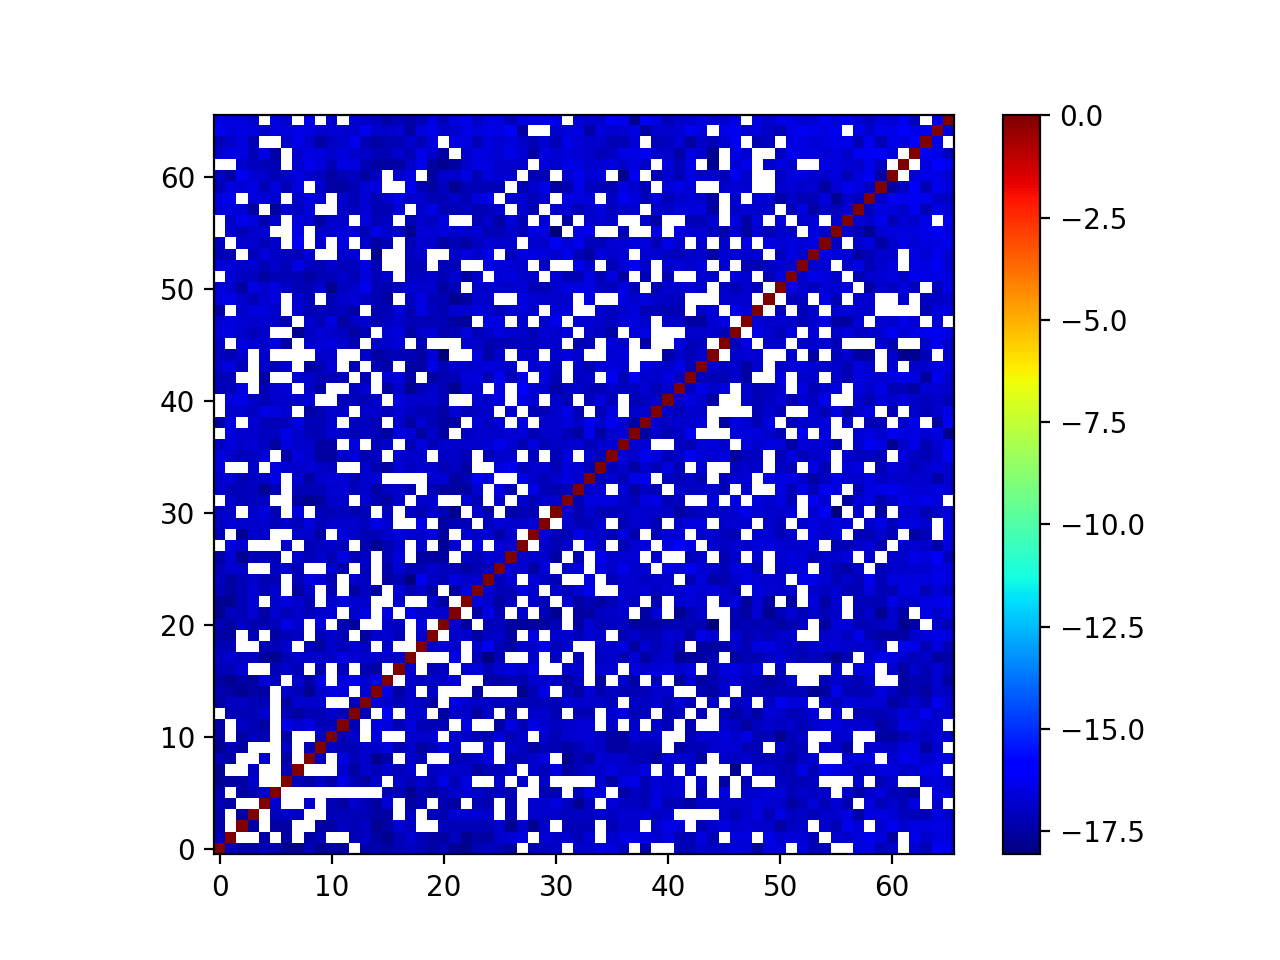

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [57]:
num_basis=np.size(gs.basis[:,0])
cov=np.zeros((num_basis,num_basis),float)
for i in range(num_basis):
    for j in range(i+1):
        cov[i,j]=np.dot(gs.basis[i],gs.basis[j])
        cov[j,i]=cov[i,j]
figure()
imshow(log10(abs(cov)),origin="lower")
#imshow(cov,origin="lower")
colorbar()

<IPython.core.display.Javascript object>


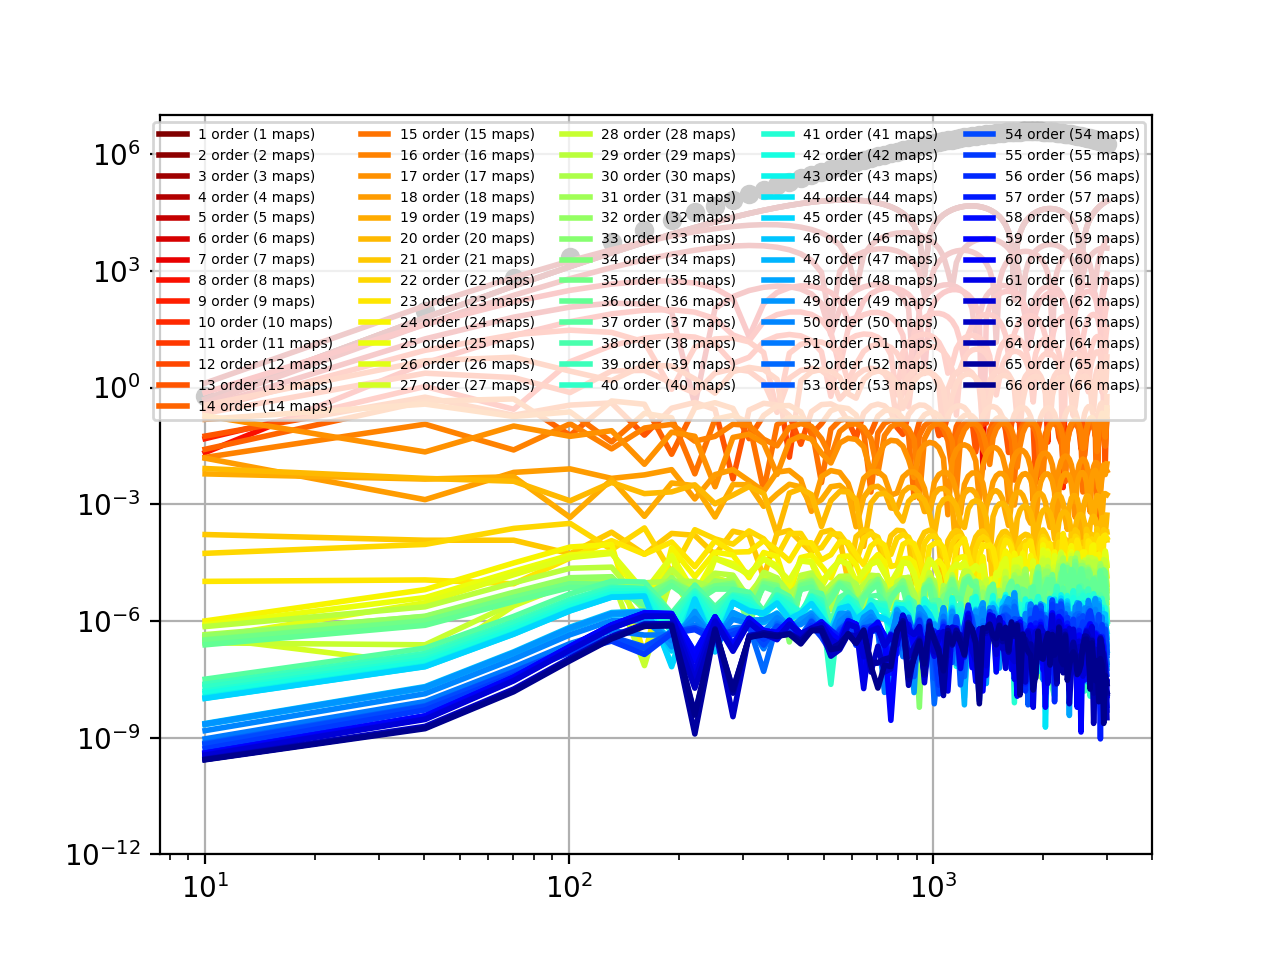

In [58]:
cmap = plt.get_cmap('jet') 

figure()
plot(nu,Inu,"ko",lw=2)
#plot(t_nu,t_Inu,"c.",lw=2)
num_basis=np.size(gs.basis[:,0])
for i in range(num_basis):
    color = cmap((-float(i)+num_basis)/num_basis)
    gpar=gs.get_basis_coeffs(Inu,i+1,n_is_der_order=False)
    plot(nu,abs(Inu-gs.reconstruct_sed(*gpar)),"-",c=color,lw=2,label=str(i+1) + " order (" + str(len(gpar)) + " maps)")
#     gpar=gs1.get_gram_schmidt_param(nu,Inu,i+1,n_is_der_order=True)
#     plot(t_nu,abs(t_Inu-gs1.reconstruct_sed(t_nu,*gpar)),"--",c=color,lw=2,label=str(i+1) + " order")
#     plot(nu,abs(Inu-gs1.reconstruct_sed(nu,*gpar)),"k.",lw=2,label="")
    
#plot(t_nu,abs(t_Inu-quad_spline_fn(t_nu)),"k-",lw=2,alpha=0.4,label="Quadratic spline")
#plot(t_nu,abs(t_Inu-cub_spline_fn(t_nu)),"k--",lw=2,alpha=0.4,label="Cubic spline")
ylim(1e-12,1e7)
loglog()
grid()
legend(loc=0,ncol=5,fontsize=5)
savefig(figpath + "gs_fit_around_3order_fit_linear_spacing.pdf",dpi=150,bbox_inches="tight")

In [52]:
fn=interp1d(relative_err,compression,assume_sorted=False)
fn(1e-6)

array(0.44423512179535946)

<IPython.core.display.Javascript object>


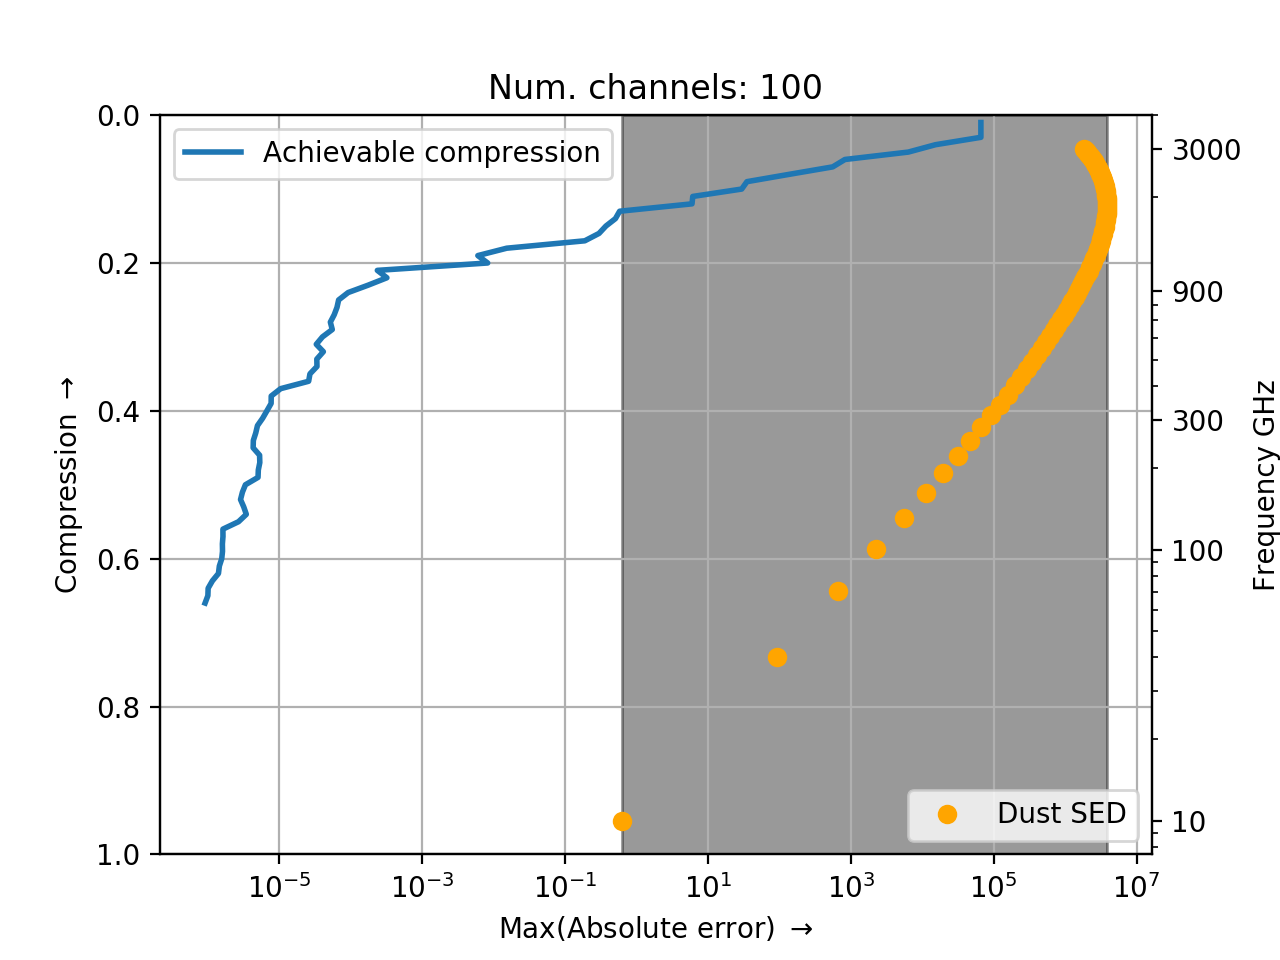

In [76]:
num_basis=np.size(gs.basis[:,0])
relative_err=[]
compression=[]
for i in range(num_basis):
    color = cmap((-float(i)+num_basis)/num_basis)
    gpar=gs.get_basis_coeffs(Inu,i+1,n_is_der_order=False)
    diff=abs(Inu-gs.reconstruct_sed(*gpar)) ; diff_max=max(diff)
    relative_err.append(diff_max)
    #print (float(i+1)/np.size(nu))
    compression.append((float(i+1)/np.size(nu)))
    
figure()
plot(relative_err,compression,lw=2,label="Achievable compression")
axvspan(min(Inu),max(Inu),color="Black",alpha=0.4)
ylabel(r"Compression $\rightarrow$")
xlabel(r"Max(Absolute error) $\rightarrow$")
ylim(1,0.0001)
semilogx()
legend(loc="upper left")
grid()
twinx()
plot(Inu,nu,"o",lw=2,c="orange",label="Dust SED")
loglog()
ylabel(r"Frequency GHz")
yticks([10,100,300,900,3000],[10,100,300,900,3000])
legend(loc="lower right")
title("Num. channels: " + str(np.size(nu)))
savefig(figpath + "compression_vs_accuracy_num_channels" + str(np.size(nu)) + ".pdf")

<IPython.core.display.Javascript object>


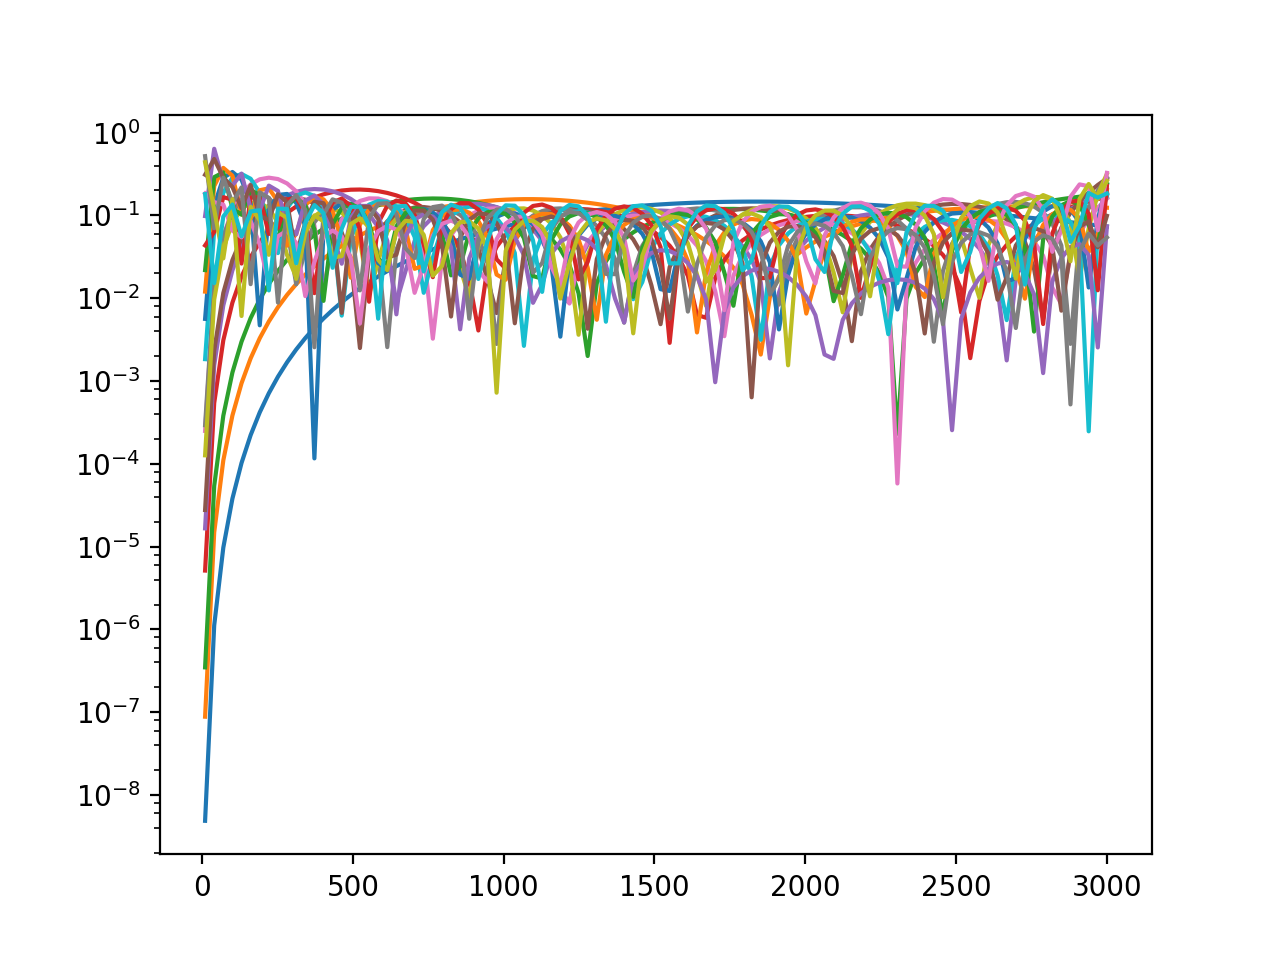

[]

In [68]:
# figure()
# for i in range(len(gs.vectors)):
#     plot(gs.nu,gs.vectors[i],label=str(i))
# legend(loc=0,ncol=5)

figure()
for i in range(20):
    plot(nu,abs(gs.basis[i]),label=str(i))
semilogy()
#legend(loc=0,ncol=5)

# cov=zeros((shape(gs1.basis)[0],shape(gs1.basis)[0]),float)
# for i in range(shape(gs1.basis)[0]):
#     for j in range(shape(gs1.basis)[0]):
#         cov[i,j]=np.dot(gs1.basis[i],gs1.basis[j])
        
# figure()
# imshow(log10(abs(cov)))
# colorbar()